In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [21]:
data = pd.read_csv('abalone.csv')
df = pd.DataFrame(data)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


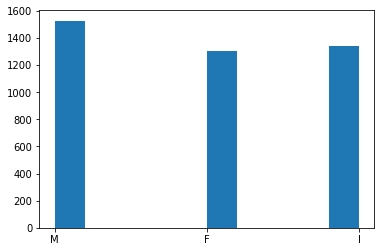

In [3]:
plt.hist(df.Sex)
plt.show()

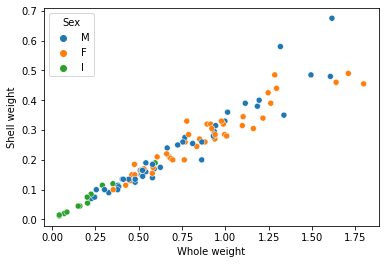

In [4]:
sns.scatterplot(data=df[:100],x='Whole weight',y='Shell weight',hue='Sex')
plt.xlabel('Whole weight')
plt.ylabel('Shell weight')
plt.show()

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot: xlabel='Rings'>

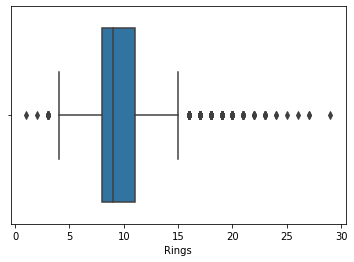

In [7]:
sns.boxplot(x=df['Rings'])

In [62]:
print(df.select_dtypes(include=['object']).columns.tolist())

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Sex']])
df[ohe.categories_[0]] = transformed.toarray()
df.head()


['Sex']


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [63]:
df['Age'] = df['Rings'] + 1.5
X = pd.DataFrame(df.drop(['Rings','Sex','Age'],axis=1))
Y = pd.DataFrame(df['Age'],columns=['Age'])
X.head()
Y.head()


,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
        -0.68801788,  1.31667716]])

In [65]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3)

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(train_X, train_Y)

In [67]:
Y_pred_train = model.predict(train_X)
Y_pred_test = model.predict(test_X)

In [68]:
from sklearn.metrics import mean_squared_error

print ('MSE =',mean_squared_error(test_Y, Y_pred_test))


MSE = 4.787269409763756
